# Linear Regression 

### First example 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn import metrics
%matplotlib inline

In [7]:
#store data into datadrame
df = pd.read_csv('NFLX.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...,...
4869,2021-09-24,592.500000,592.979980,583.640015,592.390015,592.390015,2124800
4870,2021-09-27,587.950012,593.580017,576.929993,592.640015,592.640015,2504700
4871,2021-09-28,589.000000,599.539978,580.159973,583.849976,583.849976,4431100
4872,2021-09-29,589.010010,609.880005,588.010010,599.059998,599.059998,6221000


In [8]:
df.shape

(4874, 7)

In [9]:
df.describe


<bound method NDFrame.describe of             Date        Open        High         Low       Close   Adj Close  \
0     2002-05-23    1.156429    1.242857    1.145714    1.196429    1.196429   
1     2002-05-24    1.214286    1.225000    1.197143    1.210000    1.210000   
2     2002-05-28    1.213571    1.232143    1.157143    1.157143    1.157143   
3     2002-05-29    1.164286    1.164286    1.085714    1.103571    1.103571   
4     2002-05-30    1.107857    1.107857    1.071429    1.071429    1.071429   
...          ...         ...         ...         ...         ...         ...   
4869  2021-09-24  592.500000  592.979980  583.640015  592.390015  592.390015   
4870  2021-09-27  587.950012  593.580017  576.929993  592.640015  592.640015   
4871  2021-09-28  589.000000  599.539978  580.159973  583.849976  583.849976   
4872  2021-09-29  589.010010  609.880005  588.010010  599.059998  599.059998   
4873  2021-09-30  608.049988  619.000000  608.049988  610.340027  610.340027   

     

In [10]:
df.notnull

<bound method DataFrame.notnull of             Date        Open        High         Low       Close   Adj Close  \
0     2002-05-23    1.156429    1.242857    1.145714    1.196429    1.196429   
1     2002-05-24    1.214286    1.225000    1.197143    1.210000    1.210000   
2     2002-05-28    1.213571    1.232143    1.157143    1.157143    1.157143   
3     2002-05-29    1.164286    1.164286    1.085714    1.103571    1.103571   
4     2002-05-30    1.107857    1.107857    1.071429    1.071429    1.071429   
...          ...         ...         ...         ...         ...         ...   
4869  2021-09-24  592.500000  592.979980  583.640015  592.390015  592.390015   
4870  2021-09-27  587.950012  593.580017  576.929993  592.640015  592.640015   
4871  2021-09-28  589.000000  599.539978  580.159973  583.849976  583.849976   
4872  2021-09-29  589.010010  609.880005  588.010010  599.059998  599.059998   
4873  2021-09-30  608.049988  619.000000  608.049988  610.340027  610.340027   

    

In [11]:
pd.DatetimeIndex(df['Date']).month

Int64Index([5, 5, 5, 5, 5, 5, 6, 6, 6, 6,
            ...
            9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
           dtype='int64', name='Date', length=4874)

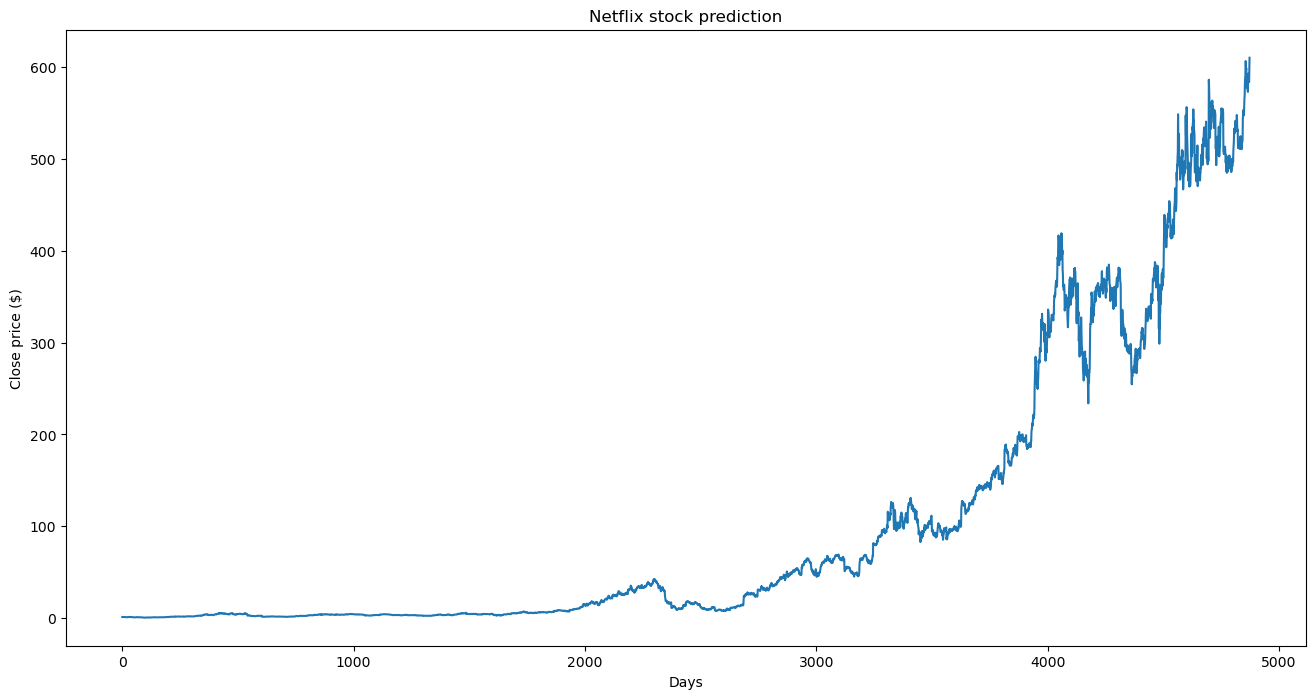

In [12]:
#Closing price generally refers to the last price at which a stock trades during a regular trading session
plt.figure(figsize=(16,8))
plt.title('Netflix stock prediction')
plt.xlabel('Days')
plt.ylabel('Close price ($)')
plt.plot(df.Close)

<AxesSubplot:xlabel='Date', ylabel='Close'>

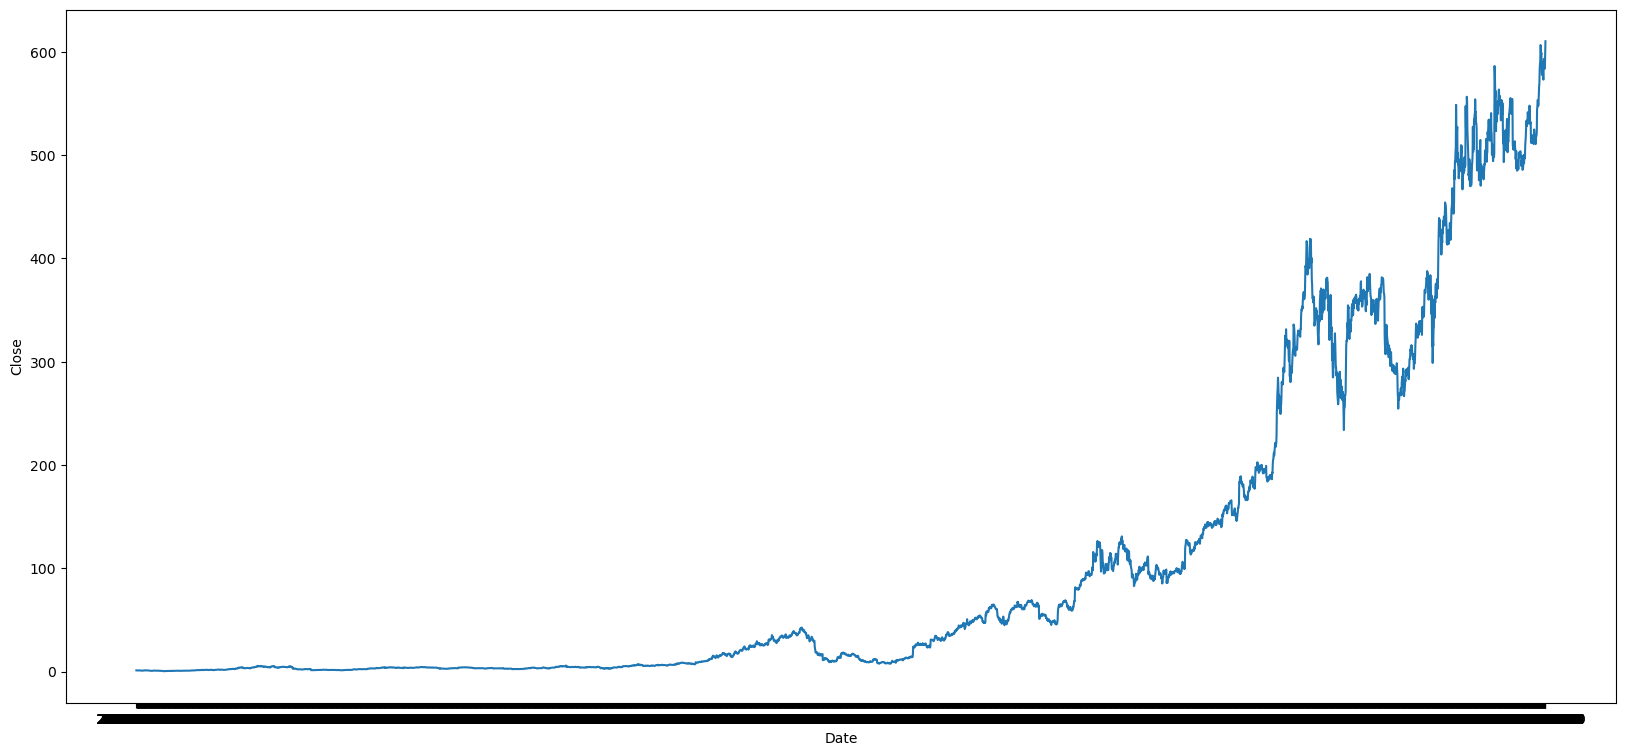

In [13]:
#use lineplot to show the growth of price by date
#df['Date'] = pd.to_datetime(df.Date)
pd.DatetimeIndex(df['Date']).month
plt.figure(figsize=(20,9))
sns.lineplot(data=df,x=df.Date,y=df.Close)

/tmp/ipykernel_68762/3518335640.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45)


[Text(0, 0, ''),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, ''),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, ''),
 Text(19, 0, ''),
 Text(20, 0, ''),
 Text(21, 0, ''),
 Text(22, 0, ''),
 Text(23, 0, ''),
 Text(24, 0, ''),
 Text(25, 0, ''),
 Text(26, 0, ''),
 Text(27, 0, ''),
 Text(28, 0, ''),
 Text(29, 0, ''),
 Text(30, 0, ''),
 Text(31, 0, ''),
 Text(32, 0, ''),
 Text(33, 0, ''),
 Text(34, 0, ''),
 Text(35, 0, ''),
 Text(36, 0, ''),
 Text(37, 0, ''),
 Text(38, 0, ''),
 Text(39, 0, ''),
 Text(40, 0, ''),
 Text(41, 0, ''),
 Text(42, 0, ''),
 Text(43, 0, ''),
 Text(44, 0, ''),
 Text(45, 0, ''),
 Text(46, 0, ''),
 Text(47, 0, ''),
 Text(48, 0, ''),
 Text(49, 0, '')]

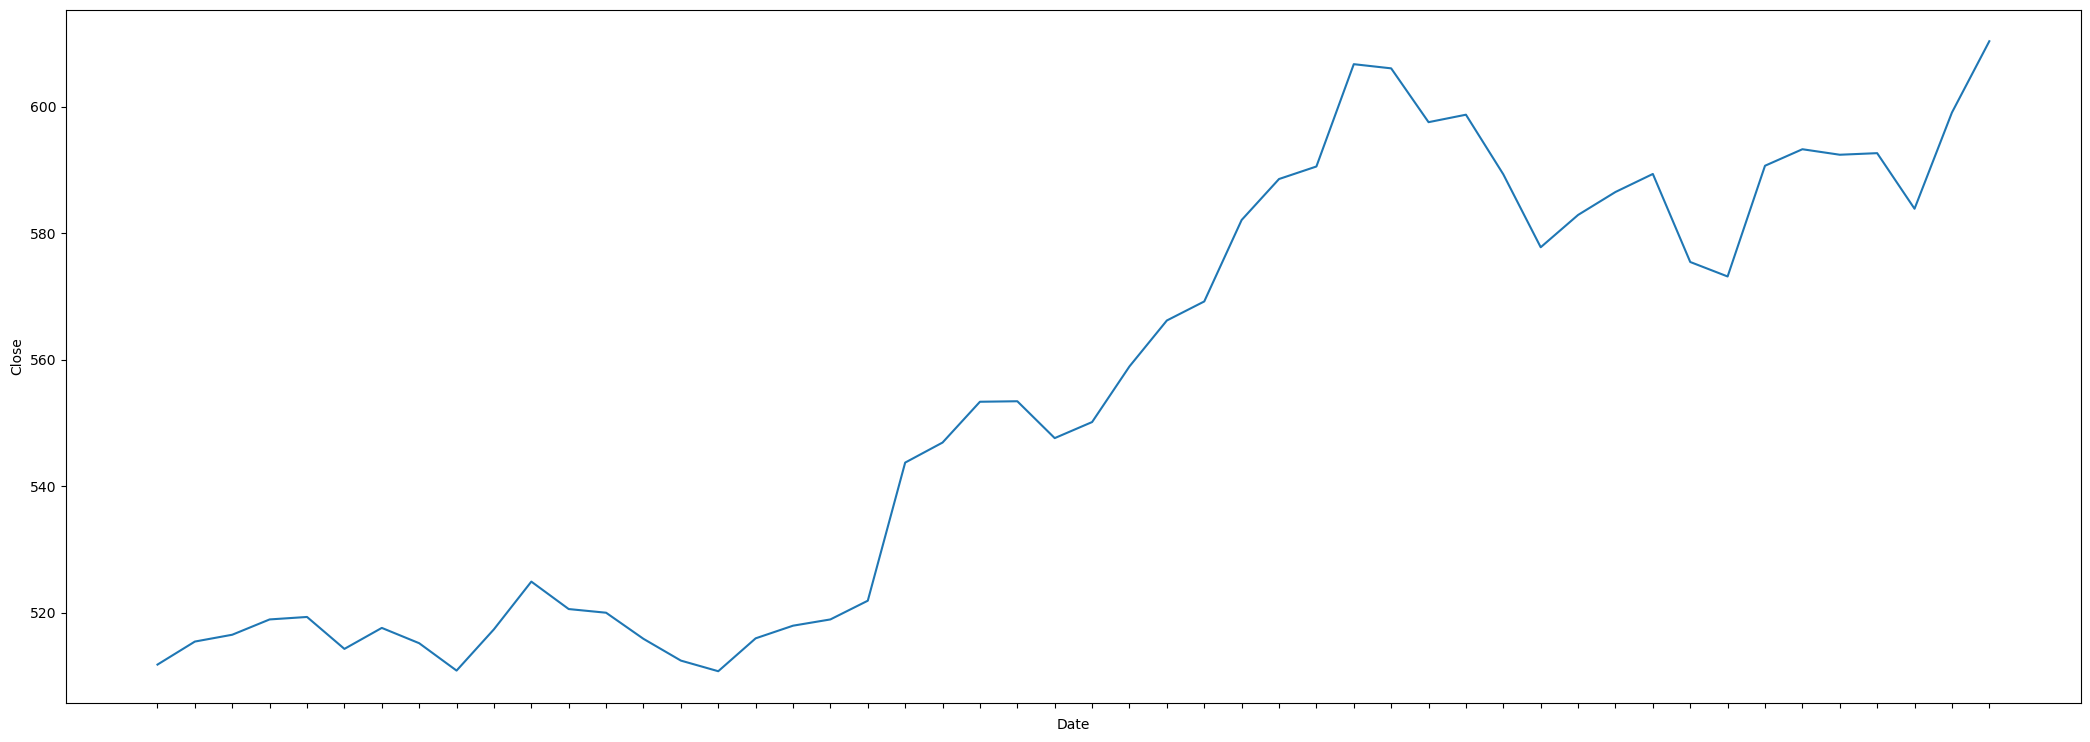

In [14]:
#https://www.absentdata.com/python-graphs/seaborn-line-chart/
plt.figure(figsize=(26,9)) 
df  = df.tail(50)
chart = sns.lineplot(data = df, x='Date',y='Close',err_style='bars',palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [15]:
df.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [16]:
x = df[['Open', 'High', 'Volume']]

In [20]:
y = df['Close']

In [21]:
model = LinearRegression()

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%
model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data

LinearRegression()

In [23]:
predicted=model.predict(x_test) #testing our model’s performance
print("R squared", metrics.r2_score(y_test,predicted))

R squared 0.9907154838946854


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures 
lg = LinearRegression() 
poly = PolynomialFeatures(degree = 5)

In [26]:
x_=poly.fit_transform(x)

In [27]:
print("x before transformation: ", x)
print("x after transformation: ", x_)
lg.fit(x_, y) # Fitting Polynomial Regression to the dataset 

x before transformation:              Open        High   Volume
4824  510.209991  513.679993  4328100
4825  512.159973  517.409973  3820500
4826  514.380005  521.130005  2254500
4827  518.080017  521.950012  2759000
4828  521.820007  524.469971  2390500
4829  519.960022  520.780029  1736000
4830  512.690002  519.789978  2534900
4831  519.000000  519.849976  2096600
4832  514.390015  515.630005  2579400
4833  513.000000  517.979980  2039400
4834  517.130005  525.409973  2556700
4835  524.000000  526.840027  1919400
4836  521.150024  522.669983  1367800
4837  520.000000  520.789978  1960500
4838  517.000000  519.570007  1673900
4839  511.859985  513.000000  1685700
4840  512.640015  521.440002  2176300
4841  515.239990  523.380005  2032800
4842  515.469971  520.789978  2309800
4843  520.000000  526.380005  2582000
4844  522.739990  548.390015  7497300
4845  545.090027  551.390015  3774300
4846  545.979980  555.549988  2602000
4847  551.479980  555.309998  2109500
4848  550.159973  552.84

LinearRegression()

In [19]:
df = pd.read_csv("boston_train.csv") # the source of the data is kaggle 
df

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [21]:

df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [22]:
# seeing howa many null values do we have 
df.isna().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [23]:
#['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO''B' 'LSTAT']
feautures = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']
target = 'medv'

<AxesSubplot:>

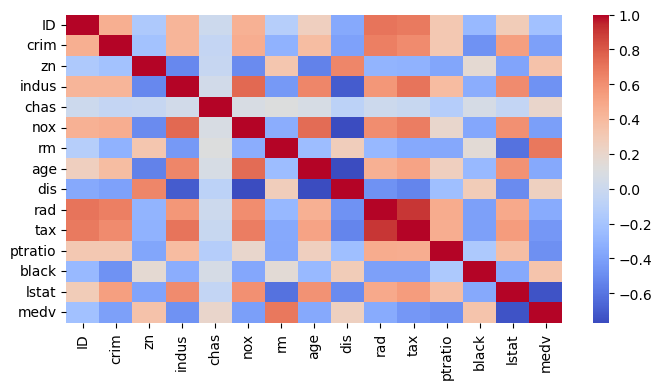

In [29]:
#correlation between variables
plt.subplots(figsize=(8,4))
sns.heatmap(df.corr(), cmap = 'coolwarm')

<AxesSubplot:>

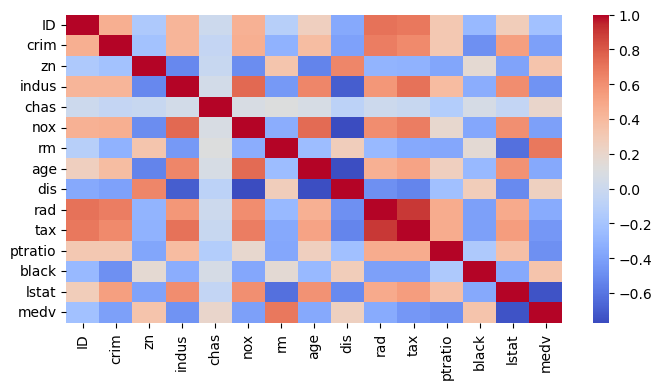

In [28]:
plt.subplots(figsize=(8,4))
sns.heatmap(np.round(df.corr(),2), cmap = 'coolwarm')

The most correlated features are medv "price" and rm and medv and black and medv and zn 

In [33]:
X= df[feautures]
Y= df['medv']
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10
329,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
330,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
331,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64


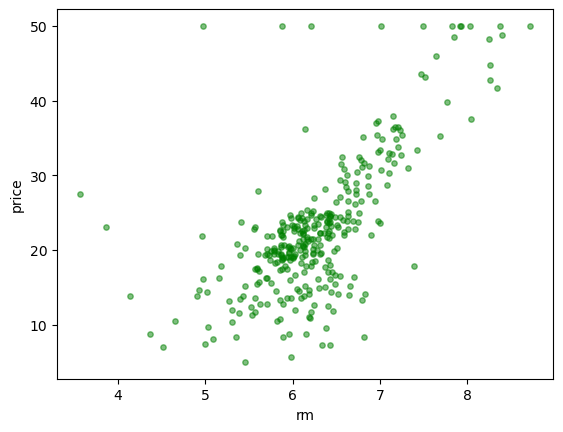

In [35]:
# Visualize RM vs PRICE.
plt.scatter(df["rm"],y,c = 'g',s=15,alpha=0.5)
plt.xlabel('rm')
plt.ylabel('price')
plt.show()

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4)

In [42]:
model = LinearRegression()
model.fit(X_train,Y_train)  #fitting the training data
predicted=model.predict(X_test) #testing our model’s performance
print("MSE", mean_squared_error(Y_test,predicted))
print("R squared", metrics.r2_score(Y_test,predicted))


MSE 29.983091802800534
R squared 0.6260853877624686


In [43]:
model.intercept_

30.025982635528763

In [52]:
model.coef_

array([-8.76850457e-02,  5.45180010e-02,  1.34413240e-01,  2.69717604e+00,
       -1.40641680e+01,  4.23417545e+00,  2.10163538e-02, -1.50461711e+00,
        2.52559579e-01, -1.30548493e-02, -7.84782352e-01,  7.43210246e-03,
       -7.30860028e-01])

In [61]:
print(list(model.coef_))
print(feautures)


[-0.08768504574991902, 0.05451800096407252, 0.13441324035625712, 2.697176036091842, -14.064167990267979, 4.23417545250573, 0.02101635382858983, -1.504617109094822, 0.2525595790843407, -0.013054849302869685, -0.7847823523158237, 0.007432102458795091, -0.7308600280816081]
['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']


In [79]:
# Display the parameters as a DataFrame.
print((np.array(model.coef_).size))
print(np.array(feautures).size)
parametersDF = pd.DataFrame(columns=np.array(feautures),index=['values'])
parametersDF.loc['values'] =np.array(model.coef_)
parametersDF['Intercept'] = model.intercept_
parametersDF

13
13


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Intercept
values,-0.087685,0.054518,0.134413,2.697176,-14.064168,4.234175,0.021016,-1.504617,0.25256,-0.013055,-0.784782,0.007432,-0.73086,30.025983


In [87]:
predY = model.predict(x)
#type(predY)

numpy.ndarray

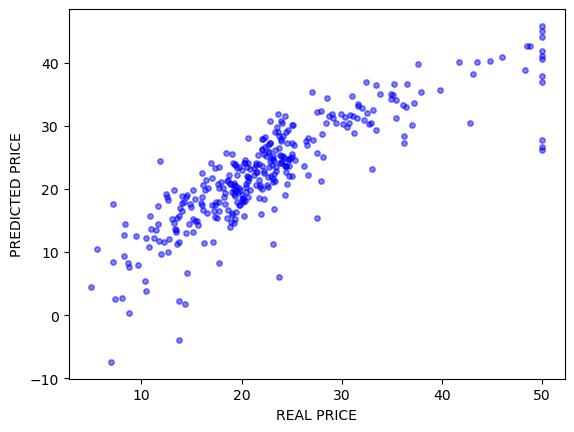

In [90]:
plt.scatter(y,predY,c = 'blue', s=15, alpha=0.5)
plt.xlabel('REAL PRICE')
plt.ylabel('PREDICTED PRICE')
plt.show()

In [93]:
pd.Series((y)).corr(pd.Series(predY))

0.8500026254951014

In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(233, 13)
(100, 13)
(233,)
(100,)


In [96]:
lm = LinearRegression()
lm.fit(X_train,Y_train)
predY_in = lm.predict(X_train)
# Calculate residual.
residual = Y_train - predY_in
residual

90      1.459062
215    -0.656807
296    -0.295918
219    -0.973032
245    22.636440
         ...    
83     -0.412361
17      1.029964
230    -1.957365
98      3.237962
322     2.211513
Name: medv, Length: 233, dtype: float64

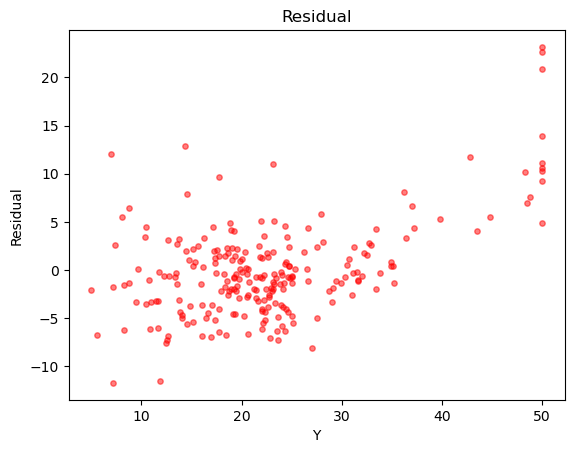

In [97]:
plt.scatter(Y_train,residual,c = 'red', s=15, alpha=0.5)
plt.xlabel('Y')
plt.ylabel('Residual')
plt.title('Residual')
plt.show()

# 2.Regularized Regression

In [120]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,mean_squared_error

In [100]:
lambdaRange = range(1,10) 
bestRsq = 0.0                                                # To contain the best R^2.
bestLambda = 0.0                                             # To contain the best lambda.
for aLambda in lambdaRange:
    ridge = Ridge(aLambda)
    ridge.fit(X_train,Y_train)                               # Train with the training set.
    rsq = ridge.score(X_test,Y_test)                         # Calculate R^2 with the testing set. 
    if (rsq > bestRsq):                                      # If R^2 is better, replace bestRsq.
        bestRsq = rsq
        bestLambda = aLambda
        print("Lambda = ", bestLambda, " and  R^2 = ", np.round(rsq,3))
ridge = Ridge(bestLambda)                                    # Final run with the bestLambda.
ridge.fit(X,Y)  

Lambda =  1  and  R^2 =  0.724


Ridge(alpha=1)

In [101]:
# Show the intercept.
ridge.intercept_

28.70733383069318

## Lasso

In [ ]:

lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)


In [105]:
lasso_regressor.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__alpha': 1.0,
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__max_iter': 1000,
 'estimator__normalize': 'deprecated',
 'estimator__positive': False,
 'estimator__precompute': False,
 'estimator__random_state': None,
 'estimator__selection': 'cyclic',
 'estimator__tol': 0.0001,
 'estimator__warm_start': False,
 'estimator': Lasso(),
 'n_jobs': None,
 'param_grid': {'alpha': [1e-15,
   1e-10,
   1e-08,
   0.001,
   0.01,
   1,
   5,
   10,
   20,
   30,
   35,
   40,
   45,
   50,
   55,
   100]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'neg_mean_squared_error',
 'verbose': 0}

In [110]:
y_pred_lasso = lasso_regressor.predict(X)

In [111]:
pd.Series((y)).corr(pd.Series(y_pred_lasso))

0.8200725107178516

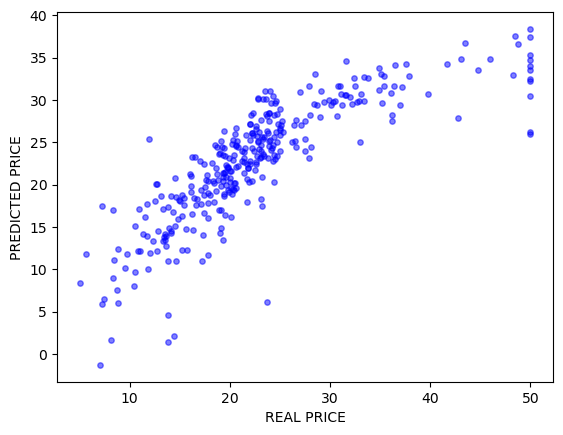

In [112]:
plt.scatter(y,y_pred_lasso,c = 'blue', s=15, alpha=0.5)
plt.xlabel('REAL PRICE')
plt.ylabel('PREDICTED PRICE')
plt.show()

In [122]:
print("MSE", mean_squared_error(y,y_pred_lasso))
print("MAE",mean_absolute_error(y,y_pred_lasso))
print("MAPE", mean_absolute_percentage_error(y,y_pred_lasso))
print("RMSE",mean_squared_error(y,y_pred_lasso,squared=False))
print("R squared", metrics.r2_score(y,y_pred_lasso))

MSE 27.687442840623532
MAE 3.6143983222318066
MAPE 0.1723869066606247
RMSE 5.26188586351163
R squared 0.669993956343535
